## Phase 3

### Header
#### Course Name: CSE487
#### Project name: Core Trends Analysis
#### Name of group member: Truong Pham, Ricky Chen

### Q Write down the following information: 
#### 1. Problem Statement: 
Our goal is to research and find correlations between modern day technology users and their demographics. Our project focuses on understanding the current patterns that different groups tend to follow. This is an important issue because it shows what interests the younger and older generations are looking towards. This will help companies decide what they should focus on building towards because groups tend to follow trends. If people follow trends and companies develop products and ideas of those trends they will be able to exponentially grow their companie with their product and ideas.

#### 2. Hypothesis:
    + Model data based on age, race and sex/gender 
    + Find Trends in social media
    + Hypothesize there will be significant group that companies will be able to correlate their business with

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [1906]:
# import your cleaned dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
df = pd.read_csv("data/Phase_1_data", header=0)
print(df.head(5))

   respid  sample  comp    int_date  lang  cregion  state  density  sfips  \
0       0       1     1  2019-01-08     1        3     37        2  37069   
1       1       1     1  2019-01-08     1        2     39        3  39025   
2       2       1     1  2019-01-08     1        1     34        4  34025   
3       3       1     1  2019-01-08     1        2     18        3  18039   
4       4       1     1  2019-01-14     1        2     26        2  26027   

   qs1  ...  racecmb  birth_hisp  inc  party  partyln  hh1 hh3 qc1    weight  \
0    2  ...        2                3      2             2   2      0.821656   
1    2  ...        1                8      1             2   2      0.817625   
2    2  ...        1                7      1             2   2      0.821656   
3    2  ...        4                6      3        2    2   2      0.821656   
4    2  ...        1                7      3        1    2   2      0.817625   

  cellweight  
0             
1             
2          

#### 4 Modeling  
Please take a look at https://scikit-learn.org/stable/. First of all, understand what is the problem of your research such as classification problem, regression problem, clustering problem...... Then choose your algorithm. For each algorithm, you need to answer the following 5 questions. We give the example answer in section 6. 

**4.1 Method 1**
   
#### Q: What assumptions need to be verified at this step?
#### A: We need to assume that there is a correlation between age and internet usage. I assume that younger generations will be the major internet usage
#### Q: What algorithm did you choose?
#### A: Probablity Calibration of Classifiers
#### Q: Why you choose this algorithm?
#### A: I used this algorithm because I wanted to see the confidence on   the prediction between age and social media correlation. The                algorithm is fitting for age and internet usage  because it shows the probability of which age groups is more likely to have higher internet usage.
#### Q: What metric can measure the quality of your algorithm?
#### A: The lower the bearier score loss is the more accurate the age group range selected will be in this case it will be >35
#### Q: What is the outcome?
#### A: The outcome shows the brier score losses to be
        no calibration: 0.551 
        iso: 0.558 
        sig: 0.548         
#### Q: Analysis and discussion:
#### A:  the average of the 3 calibration comes out to around ~0.552 which is pretty high since the lower the brier scores which ranges from 0 the more accurate the predictions are. The age range set for binary was > 35 which was tested against GaussianNB predictions for the age group >35 and their internet frequency usage. From this we can tell that the predictions were overall pretty true that the younger generation has more internet usage because >35 was classified in this case as false and after running it against the GaussianNB predictions with the ages in the dataframe we can see that the bearier score losses is quite high which shows that ages > 35 do not really use the internet as much as the younger generations.

In [1907]:
# code for modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV

data = df[['age', 'intfreq']].fillna(0)


X = data[['age']].iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data[['intfreq']].iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

clf = GaussianNB()
clf.fit(X,Y.ravel())
prob = clf.predict_proba(X)[:,1]

#iso cali
clf_isotonic = CalibratedClassifierCV(clf, cv=2, method='isotonic')
clf_isotonic.fit(X, Y.ravel())
prob_pos_iso = clf_isotonic.predict_proba(X)[:, 1]
print(prob_pos_iso)

#sigmoid cali
clf_sigmoid = CalibratedClassifierCV(clf, cv=2, method='sigmoid')
clf_sigmoid.fit(X, Y.ravel())
prob_pos_sig = clf_sigmoid.predict_proba(X)[:, 1]
print(prob_pos_sig)

ages = X.flatten()
ages = (ages > 35).astype(int)
print(ages)

clf_score = brier_score_loss(ages, prob)
print("No calibration: %1.3f" % clf_score)

clf_isotonic_score = brier_score_loss(ages, prob_pos_iso)
print("With isotonic calibration: %1.3f" % clf_isotonic_score)


clf_sigmoid_score = brier_score_loss(ages, prob_pos_sig)
print("With sigmoid calibration: %1.3f" % clf_sigmoid_score)


[0.05917856 0.20519488 0.13454731 ... 0.20497608 0.04918914 0.46812605]
[0.0965065  0.20746862 0.14384907 ... 0.17690307 0.06222341 0.42719416]
[1 1 1 ... 1 1 0]
No calibration: 0.551
With isotonic calibration: 0.558
With sigmoid calibration: 0.548


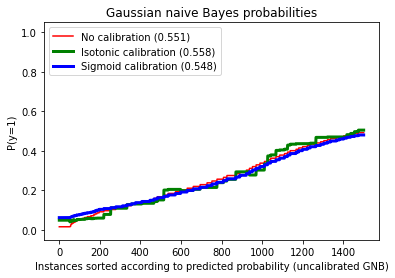

In [1908]:
# code for visualization the outcome
plt.figure()
order = np.lexsort((prob, ))
plt.plot(prob[order], 'r', label='No calibration (%1.3f)' % clf_score)
plt.plot(prob_pos_iso[order], 'g', linewidth=3,
         label='Isotonic calibration (%1.3f)' % clf_isotonic_score)
plt.plot(prob_pos_sig[order], 'b', linewidth=3,
         label='Sigmoid calibration (%1.3f)' % clf_sigmoid_score)
plt.ylim([-0.05, 1.05])
plt.xlabel("Instances sorted according to predicted probability "
           "(uncalibrated GNB)")
plt.ylabel("P(y=1)")
plt.legend(loc="upper left")
plt.title("Gaussian naive Bayes probabilities")

plt.show()

**4.2 Method 2**

#### Q: What assumptions need to be verified at this step?
#### A: Assumptions made are that there is age group correlation with different social media platforms 
#### Q: What algorithm did you choose?
#### A: kmeans
#### Q: Why you choose this algorithm?
#### A: I want to see the clusters for age groups and social medias
#### Q: What metric can measure the quality of your algorithm?
#### A: The more clusters in an area will show which social media is most popular among all age groups.
#### Q: What is the outcome?
#### A: We can see from the graphs that there is indeed a correlation between the clusters of ages and social media platforms
#### Q: Analysis and discussion:
#### A: We can see from the graphs that the clusters for Snapchat,Youtube is the most similar to the ages clusters and because of that we can conclude that most of the age groups are on those two social media platforms and companies should direct their focus in advertising in those platforms.

Text(0.5, 1.0, 'Youtube')

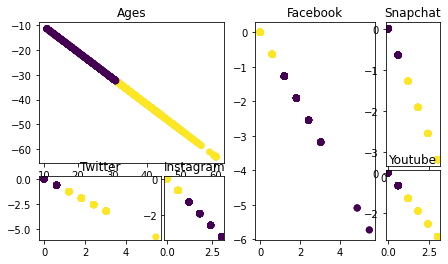

In [1909]:
# code for modeling
from sklearn.cluster import KMeans

random_state = 170
data = df[['age', 'sns2a','sns2b','sns2c','sns2d','sns2e']].fillna(0)

ages = data[['age']].iloc[:, 0].values.reshape(-1, 1)

twitter = data[['sns2a']].iloc[:, 0].values.reshape(-1, 1)
instagram = data[['sns2b']].iloc[:, 0].values.reshape(-1, 1)
facebook = data[['sns2c']].iloc[:, 0].values.reshape(-1, 1)
snapchat = data[['sns2d']].iloc[:, 0].values.reshape(-1, 1)
youtube = data[['sns2e']].iloc[:, 0].values.reshape(-1, 1)

gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0.05, right=0.48, wspace=0.05)

#ages
transformation = [[0.60834549, -0.63667341]]
x = np.dot(ages,transformation)
y = KMeans(n_clusters=2,random_state=random_state).fit_predict(x)

plt.subplot(gs1[:-1, :])
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Ages")

#twitter
transformation_t = [[0.60834549, -0.63667341]]
x_t = np.dot(twitter,transformation)
y_t = KMeans(n_clusters=2,random_state=random_state).fit_predict(x_t)

plt.subplot(gs1[-1, :-1])
plt.scatter(x_t[:, 0], x_t[:, 1], c=y_t)
plt.title("Twitter")

#instagram

transformation_i = [[0.60834549, -0.63667341]]
x_i = np.dot(instagram,transformation)
y_i = KMeans(n_clusters=2,random_state=random_state).fit_predict(x_i)

plt.subplot(gs1[-1, -1])
plt.scatter(x_i[:, 0], x_i[:, 1], c=y_i)
plt.title("Instagram")


gs2 = gridspec.GridSpec(3, 3)
gs2.update(left=0.55, right=0.98, hspace=0.05)

#facebook 
transformation_f = [[0.60834549, -0.63667341]]
x_f = np.dot(facebook,transformation)
y_f = KMeans(n_clusters=2,random_state=random_state).fit_predict(x_f)

plt.subplot(gs2[:, :-1])
plt.scatter(x_f[:, 0], x_f[:, 1], c=y_f)
plt.title("Facebook")

#snapchat
transformation_s = [[0.60834549, -0.63667341]]
x_s = np.dot(snapchat,transformation)
y_s = KMeans(n_clusters=2,random_state=random_state).fit_predict(x_s)

plt.subplot(gs2[:-1, -1])
plt.scatter(x_s[:, 0], x_s[:, 1], c=y_s)
plt.title("Snapchat")

#youtube

transformation_y = [[0.60834549, -0.63667341]]
x_y = np.dot(youtube,transformation)
y_y = KMeans(n_clusters=2,random_state=random_state).fit_predict(x_y)

plt.subplot(gs2[-1, -1])
plt.scatter(x_s[:, 0], x_s[:, 1], c=y_s)
plt.title("Youtube")


**4.3 Method 3**

#### Q: What assumptions need to be verified at this step?
#### A: We need to assume that the frequency of internet use and population density are correlated. I assume that there will be certain clusters at different frequencies for different densities.
#### Q: What algorithm did you choose?
#### A: DBSCAN algorithm.
#### Q: Why you choose this algorithm?
#### A: I used this algorithm because I wanted to find the correlation between population density and frequency of internet use. It is advantageous for this particular correlation set because I assume that there will be alot of deviations between each race and this DBSCAN algorithm is robust to noise.
#### Q: What metric can measure the quality of your algorithm?
#### A: The amount of clusters created can be used to measure the qwality of the algorithm. If the algorithhm generates no clusters, then there is no correlation whereas if there is a cluster for each age group, we can see that there is a correlation between internet usage and race.
#### Q: What is the outcome?
#### A: (answer here)
#### Q: Analysis and discussion:
#### A: (answer here)

In [1911]:
from sklearn.linear_model import LinearRegression

data = df[['density', 'intfreq']].fillna(0)


X = data[['density']].iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data[['intfreq']].iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make prediction


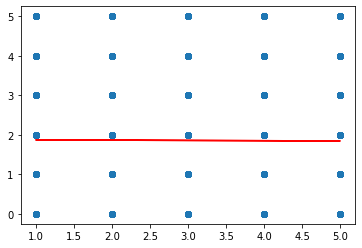

In [1912]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

**4.4 Method 4**

#### Q: What assumptions need to be verified at this step?
#### A: (answer here)
#### Q: What algorithm did you choose?
#### A: (answer here)
#### Q: Why you choose this algorithm?
#### A: (answer here) correlation between income and social media used RIDGE knn
#### Q: What metric can measure the quality of your algorithm?
#### A: (answer here)
#### Q: What is the outcome?
#### A: (answer here)
#### Q: Analysis and discussion:
#### A: (answer here)

In [1913]:
# code for modeling
# https://datatofish.com/multiple-linear-regression-python/ use this gui guide for phase 5
from sklearn import linear_model

data = df[df['inc'] != 98]
data = data[data['inc'] != 99]
data0 = data[['web1a', 'web1b', 'web1c', 'web1d', 'web1e', 'web1f', 'web1g', 'web1h', 'web1i']].fillna(0)
data1 = data[['inc']].fillna(0)
# For the web columns: 1 = yes, 2 = no


X = data0
Y = data1
linear_regressor = linear_model.BayesianRidge()
linear_regressor.fit(X, Y.values.ravel())
prediction = linear_regressor.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1]])
print(prediction)
predictions = []
for i in range(9):
    newPred = [2, 2, 2, 2, 2, 2, 2, 2, 2]
    newPred[i] = 1
    predictions.append(newPred)
print(predictions)


[7.1028227]
[[1, 2, 2, 2, 2, 2, 2, 2, 2], [2, 1, 2, 2, 2, 2, 2, 2, 2], [2, 2, 1, 2, 2, 2, 2, 2, 2], [2, 2, 2, 1, 2, 2, 2, 2, 2], [2, 2, 2, 2, 1, 2, 2, 2, 2], [2, 2, 2, 2, 2, 1, 2, 2, 2], [2, 2, 2, 2, 2, 2, 1, 2, 2], [2, 2, 2, 2, 2, 2, 2, 1, 2], [2, 2, 2, 2, 2, 2, 2, 2, 1]]


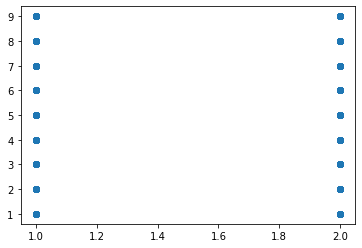

In [1914]:
# code for visualization the outcome
plt.scatter(X[['web1a']], Y)
plt.show()

**4.5 Method 5**

#### Q: What assumptions need to be verified at this step?
#### A: (answer here)
#### Q: What algorithm did you choose?
#### A: (answer here)
#### Q: Why you choose this algorithm?
#### A: (answer here) correlation between income and social media used bayes
#### Q: What metric can measure the quality of your algorithm?
#### A: (answer here)
#### Q: What is the outcome?
#### A: (answer here)
#### Q: Analysis and discussion:
#### A: (answer here)

In [1915]:
# code for modeling

In [1916]:
# code for visualization the outcome

#### 5 Each person contribution
(for example, person 1 implemented first algorithm and person 2 helped to analysis the first algorithm ....) 

#### 6 Example

#### Q: What assumptions need to be verified at this step?
#### A: A Hospital Care chain wants to open a series of Emergency-Care wards within a region. We assume that the hospital knows the location of all the maximum accident-prone areas in the region. They have to decide the number of the Emergency Units to be opened and the location of these Emergency Units, so that all the accident-prone areas are covered in the vicinity of these Emergency Units. We want to help to decide the location of these Emergency Units so that the whole region is covered.
#### Q: What algorithm did you choose?
#### A: k-means
#### Q: Why you choose this algorithm?
#### A: After observing the data, we don't know how many locations there are, and we don't have labelled ground truth data. So we need a clustering algorithm. Kmeans clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. Therefore, we choose k-means algorithm. **I already have completed PCA to map my data to 2 dimension for k-means algorithm.**
#### Q: What metric can measure the quality of your algorithm?
#### A: I would use Percentage of Variance Explained (PVE) to evaluate clustering algorithm.
#### Q: What is the outcome?
#### A: I divided my data into train dataset (contains 90% of data) and test dataset (contains 10% of data). I used the test data to evaluate the outcome of k-means algorithm. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling. I will use Elbow method and Silhouette analysis for evaluation.
+ Elbow method:
We use elbow method to check the k we choose.
The following figure shows the result: ...
+ Silhouette analysis: ...

#### Q: Analysis and discussion:
#### A: Accoridng the visualization of clustered data, we could conclude the location of these Emergency Units, which shows in the following image. ......

### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline;
    5 – complete 1 algorithm with complete analysis and discussion;
    10 – complete 2-3 algorithms with complete analysis and discussion;
    15 – complete 4 algorithms with complete analysis and discussion;
    20 - complete 5 algorithms with complete analysis and discussion, however, the report is the best when compared with other teams;
    25 - the whole process is prefect;
    
The submission deadline is **March 21 on 11:59:00 PM**. (Note 11:59:01 PM will be counted as late submission). Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.
